# load ecc for regions and scores for subjects

In [1]:
import pandas as pd

import numpy as np
import seaborn 
import matplotlib.pyplot as plt

DIR = '/Users/qasem/PycharmProjects/large-manifold-nbs/data/'
REGIONS = pd.read_csv(DIR+'regions_sorted.csv')[['region', '7net', '17net',]]
SUBJECTS = pd.read_csv(DIR+'subjects.csv')

SUBJECTS.rename(columns={'int_id': 'subject'}, inplace=True)
SUBJECTS.head()
task_score = pd.read_csv('data/RLfpcaScores.csv')
task_score.columns = ['str_id', 'score']
task_score.head()
df_gradients = pd.read_csv(DIR+'gradients1.csv').set_index(['subject','epoch']+REGIONS.columns.tolist()).loc[:,'ecc'].unstack('epoch')
df_gradients
df_gradients['b2e'] = df_gradients['early'] -   df_gradients['baseline']
df_gradients['e2l'] = df_gradients['late'] -    df_gradients['early']

df = df_gradients.reset_index().merge(SUBJECTS, on='subject').merge(task_score, on='str_id')
print(df.shape)
df.head()

(36432, 11)


,subject,region,7net,17net,baseline,early,late,b2e,e2l,str_id,score
0,1,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,1.365288,2.435730,1.968518,1.070442,-0.467212,AB1,-1.179789
1,1,7Networks_LH_Cont_Cing_2,Cont,ContC,2.366235,2.368263,1.640481,0.002028,-0.727782,AB1,-1.179789
2,1,7Networks_LH_Cont_Cing_3,Cont,ContC,2.249189,2.536501,2.096962,0.287311,-0.439539,AB1,-1.179789
3,1,7Networks_LH_Cont_Cing_4,Cont,ContA,0.865526,2.047069,1.090625,1.181543,-0.956444,AB1,-1.179789
4,1,7Networks_LH_Cont_Cing_5,Cont,ContC,1.643546,1.893256,2.066847,0.249709,0.173591,AB1,-1.179789


## corr between ecc and scores during epochs

In [2]:
from scipy.stats import pearsonr
import pingouin


def r_value(data, x, y):   return pearsonr(data[x], data[y])[0]
def p_value(data, x, y):   return pearsonr(data[x], data[y])[1]


X = ['baseline', 'early', 'late', 'b2e', 'e2l']
Y = ['score']

l0=[]
for y in Y:
    l1=[]
    for x in X:
        r = df.groupby(REGIONS.columns.tolist()).apply(r_value, x=x, y=y)    # grouped by region
        p = df.groupby(REGIONS.columns.tolist()).apply(p_value, x=x, y=y)
        _, pcorr = pingouin.multicomp(p, method='fdr_bh')
        pcorr = pd.Series(pcorr, index=p.index)
        l1.append(pd.concat([r, p, pcorr], axis=1, keys=['r', 'p', 'pcor']))
    l0.append(pd.concat(l1, axis=1, keys=X))
dfcr = pd.concat(l0, axis=1, keys=Y)    # cross correlation
dfcr = dfcr.droplevel(0, axis=1)
dfcr.columns.names = ['epoch', 'stat']
dfcr = dfcr.stack('epoch').reorder_levels([3, 0, 1, 2])
dfcr.head()    # df cross correlation

/Users/qasem/opt/anaconda3/envs/brainv/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,,,stat,p,pcor,r
epoch,region,7net,17net,,,
b2e,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,0.832319,0.992839,0.036567
baseline,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,0.534121,0.975598,0.107102
e2l,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,0.513847,0.976967,-0.112432
early,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,0.432030,0.986196,0.135120
late,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,0.883716,0.999546,-0.025264


In [3]:
# dfcr.to_csv('data/dfcrosscorr.csv')

In [3]:
dfcr.shape

(5060, 3)

In [4]:
dfcr.head()

,,,stat,p,pcor,r
epoch,region,7net,17net,,,
b2e,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,0.832319,0.992839,0.036567
baseline,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,0.534121,0.975598,0.107102
e2l,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,0.513847,0.976967,-0.112432
early,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,0.432030,0.986196,0.135120
late,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,0.883716,0.999546,-0.025264


In [5]:
dfcr.loc[pd.IndexSlice['b2e', :, 'DorsAttn'], 'r']

epoch  region                        7net      17net    
b2e    7Networks_LH_DorsAttn_FEF_1   DorsAttn  DorsAttnB   -0.205666
       7Networks_LH_DorsAttn_FEF_2   DorsAttn  ContA        0.154376
       7Networks_LH_DorsAttn_FEF_3   DorsAttn  DorsAttnB   -0.327745
       7Networks_LH_DorsAttn_FEF_4   DorsAttn  DorsAttnB   -0.297062
       7Networks_LH_DorsAttn_FEF_5   DorsAttn  ContA        0.059807
                                                              ...   
       7Networks_RH_DorsAttn_Post_8  DorsAttn  DorsAttnA   -0.278460
       7Networks_RH_DorsAttn_Post_9  DorsAttn  DorsAttnA   -0.212137
       7Networks_RH_DorsAttn_PrCv_1  DorsAttn  ContA        0.092455
       7Networks_RH_DorsAttn_PrCv_2  DorsAttn  ContA        0.056684
       7Networks_RH_DorsAttn_PrCv_3  DorsAttn  DorsAttnB    0.043170
Name: r, Length: 122, dtype: float64

In [6]:
dfcr.loc[pd.IndexSlice['b2e', :, 'DorsAttn'], 'r'].mean()

-0.11202165087362999

# permutation test among networks

## non-parametric test

In [7]:
samples = np.array([
    dfcr.loc[pd.IndexSlice['b2e', :, :], 'r'].sample(122, replace=True).mean()
                    for _ in range(1000)])

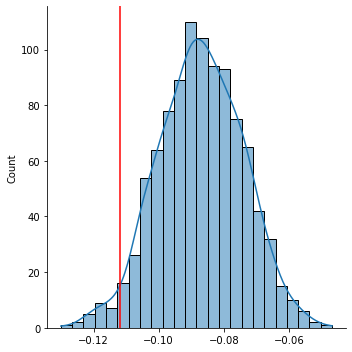

In [8]:
seaborn.displot(samples, kde=True)
plt.axvline(dfcr.loc[pd.IndexSlice['b2e', :, 'DorsAttn'], 'r'].mean(), color='r')

In [17]:
dfcr.loc[pd.IndexSlice[:, :, 'DorsAttn'], :].shape[0] // 5

122

In [9]:
# proportion of samples farther than the observed value
# num_samples = 5000; epoch = 'b2e'; network7 = 'DorsAttn'

def permutation_test(dfcr, epoch, network7, num_samples=2000, plot=False):
    len_network = dfcr.loc[pd.IndexSlice[epoch, :, network7], :].shape[0]
    samples = np.array([dfcr.loc[pd.IndexSlice[epoch, :, :], 'r'].sample(len_network, replace=True).mean() for _ in range(num_samples)])
    if plot:
        seaborn.displot(samples, kde=True)
        plt.axvline(dfcr.loc[pd.IndexSlice[epoch, :, network7], 'r'].mean(), color='r')
    ans = samples[samples < dfcr.loc[pd.IndexSlice[epoch, :, network7], 'r'].mean()].shape[0] / num_samples
    return ans if ans < 0.5 else 1-ans

0.0264

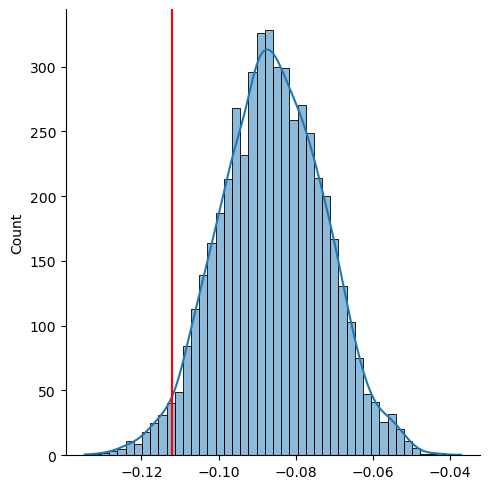

In [10]:
permutation_test(dfcr, 'b2e', 'DorsAttn', 5000, plot=True)

### epochs / 17 nets

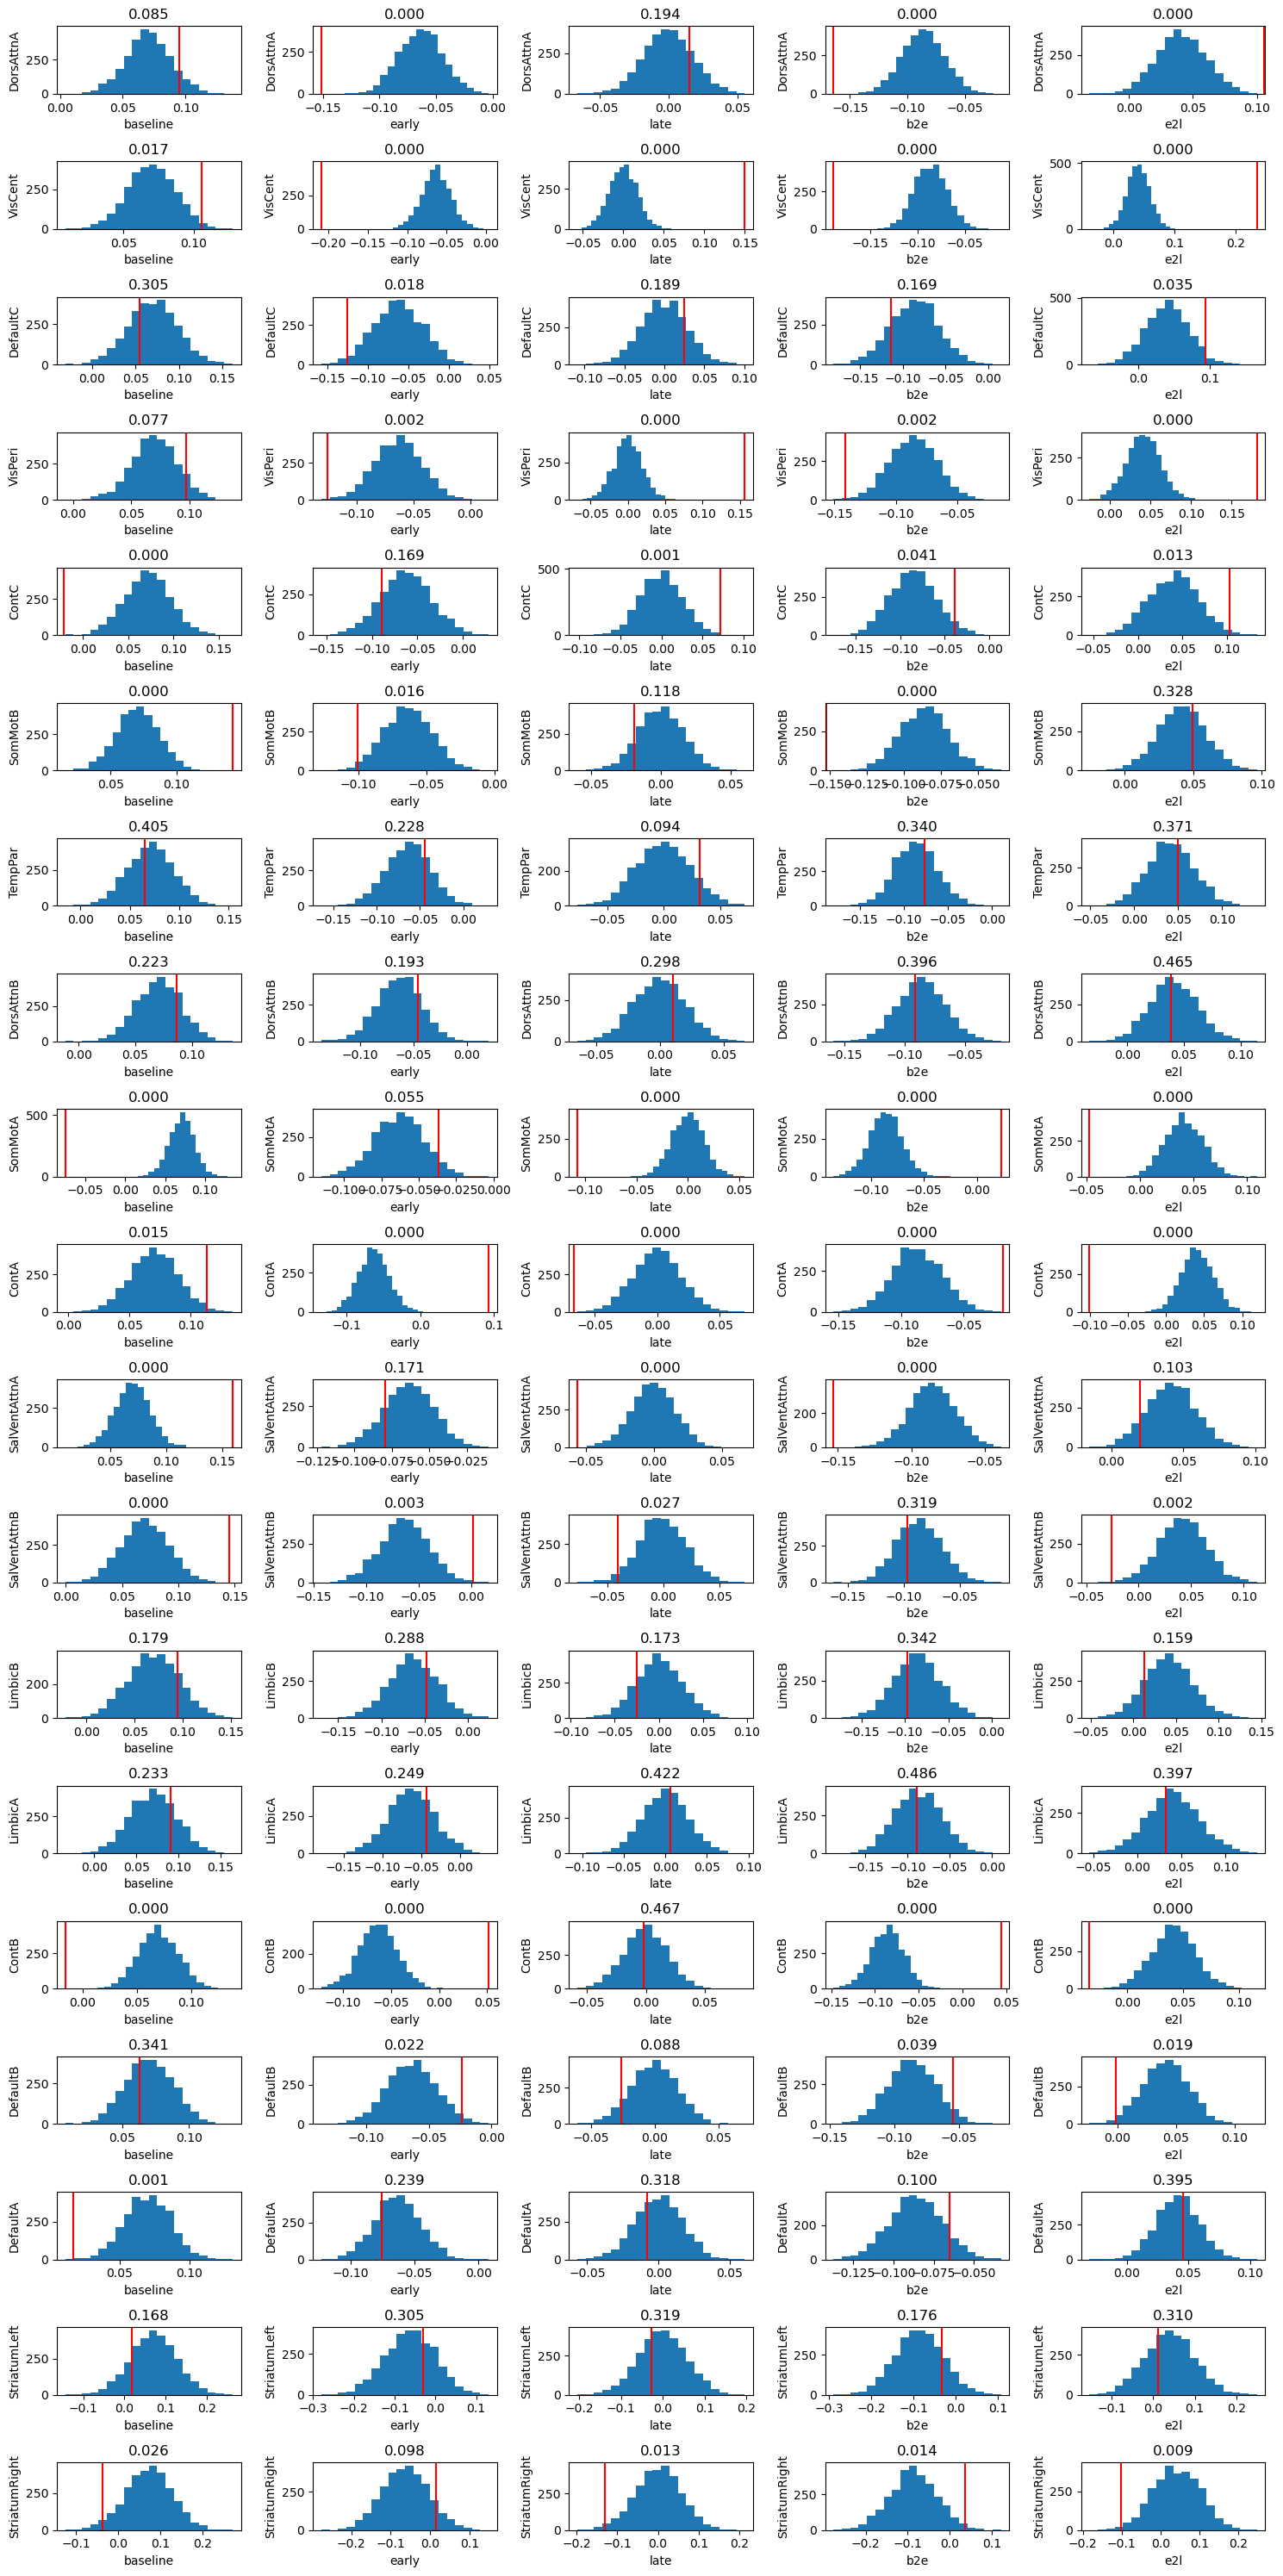

In [42]:
num_samples = 3000; nums_net = '17net'
fig, axes = plt.subplots(REGIONS[nums_net].nunique(), 5, figsize=(15, 30))

for i, net in enumerate(REGIONS[nums_net].unique()):
    break
    
    len_network = dfcr.loc[pd.IndexSlice[:, :, :, net], :].shape[0] // 5
    
    for j, epoch in enumerate(['baseline', 'early', 'late', 'b2e', 'e2l']):
        samples = np.array([dfcr.loc[pd.IndexSlice[epoch, :, :], 'r'].sample(len_network, replace=True).mean()
                            for _ in range(num_samples)])
        
        axes[i, j].hist(samples, bins=20)
        axes[i, j].axvline(dfcr.loc[pd.IndexSlice[epoch, :, :, net], 'r'].mean(), color='r')

        ans = samples[samples < dfcr.loc[pd.IndexSlice[epoch, :, :, net], 'r'].mean()].shape[0] / num_samples
        pval = ans if ans < 0.5 else 1-ans        
        axes[i, j].set_title(f'{pval:.3f}')
        axes[i, j].set_xlabel(epoch)
        axes[i, j].set_ylabel(net)

plt.tight_layout()
# plt.savefig(f'perm_{nums_net}.jpg', dpi=300)

### if close to zero, not significant

1.0

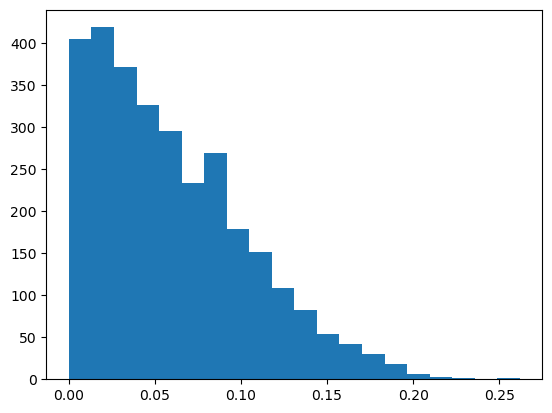

In [44]:
from scipy.stats import percentileofscore

plt.hist(abs(samples), bins=20)
1 - percentileofscore(abs(samples), true_val) / 100

# first, average on network level, then correlate with scores
to reproduce paper's figure (-0.43)

In [12]:
# Jason doesn't want to change everything to assess reproducibility
# take the ecc mean for regions in each network. 

# let's see if it's the same as prev result of -.42 correlation

In [4]:
df

,subject,region,7net,17net,baseline,early,late,b2e,e2l,str_id,score
0,1,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,1.365288,2.435730,1.968518,1.070442,-0.467212,AB1,-1.179789
1,1,7Networks_LH_Cont_Cing_2,Cont,ContC,2.366235,2.368263,1.640481,0.002028,-0.727782,AB1,-1.179789
2,1,7Networks_LH_Cont_Cing_3,Cont,ContC,2.249189,2.536501,2.096962,0.287311,-0.439539,AB1,-1.179789
3,1,7Networks_LH_Cont_Cing_4,Cont,ContA,0.865526,2.047069,1.090625,1.181543,-0.956444,AB1,-1.179789
4,1,7Networks_LH_Cont_Cing_5,Cont,ContC,1.643546,1.893256,2.066847,0.249709,0.173591,AB1,-1.179789
...,...,...,...,...,...,...,...,...,...,...,...
36427,46,Right Caudate,Striatum,StriatumRight,0.605364,2.369958,2.807657,1.764595,0.437699,ZN1,-0.116459
36428,46,Right Hippocampus,Striatum,StriatumRight,4.152882,1.333596,2.257146,-2.819287,0.923551,ZN1,-0.116459
36429,46,Right Pallidum,Striatum,StriatumRight,1.632750,1.068409,1.068012,-0.564340,-0.000398,ZN1,-0.116459
36430,46,Right Putamen,Striatum,StriatumRight,0.860830,2.656682,1.599829,1.795852,-1.056853,ZN1,-0.116459


In [47]:
df.groupby(['7net', 'subject']).mean()

baseline     early      late       b2e       e2l     score
7net subject                                                            
Cont 1        2.481211  2.338516  2.925869 -0.142696  0.587354 -1.179789
     2        2.415592  2.716553  2.642973  0.300962 -0.073581  1.104018
     3        2.567020  2.455587  2.405086 -0.111433 -0.050502 -0.302101
     4        2.246480  2.505314  2.620037  0.258834  0.114723 -1.400917
     6        2.448273  2.909101  2.610131  0.460828 -0.298970  0.868475
...                ...       ...       ...       ...       ...       ...
Vis  40       4.254337  4.296060  4.697541  0.041722  0.401481  1.119882
     41       4.544786  4.110263  4.965781 -0.434523  0.855518  0.007867
     44       4.018134  6.346883  4.618246  2.328750 -1.728638  0.350276
     45       4.699853  4.044249  5.284807 -0.655605  1.240559  1.649951
     46       5.779455  3.941617  4.980322 -1.837838  1.038705 -0.116459

[288 rows x 6 columns]

In [ ]:
df.groupby(['7net', 'subject', ]).mean().loc['DorsAttn']

,baseline,early,late,b2e,e2l,score
subject,,,,,,
1,2.246747,3.059260,2.793547,0.812513,-0.265713,-1.179789
2,2.898546,3.027078,3.038453,0.128532,0.011375,1.104018
3,3.282771,2.833171,2.701126,-0.449600,-0.132045,-0.302101
4,2.651518,2.884494,2.620192,0.232976,-0.264302,-1.400917
6,2.974715,2.883495,2.859271,-0.091219,-0.024224,0.868475
7,2.872342,3.402759,2.213884,0.530417,-1.188876,0.859943
8,2.960292,2.530243,3.203324,-0.430049,0.673081,1.433999
9,2.685572,2.686579,3.005236,0.001007,0.318656,-0.661215
10,2.805584,3.211411,2.642013,0.405827,-0.569399,-0.337563


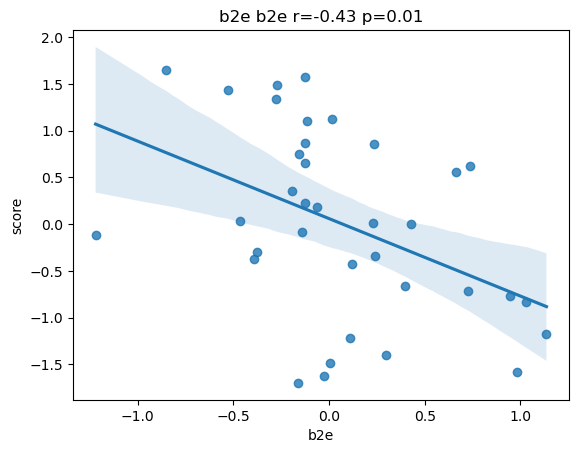

In [45]:
def scatterplot(df, epoch):
    seaborn.regplot(data=df, x=epoch, y='score')
    r, p = pearsonr(df[epoch], df['score'])
    plt.title(f'{epoch} {epoch} r={r:.2f} p={p:.2f}')


scatterplot(df.groupby(['17net', 'subject']).mean().loc['DorsAttnA'], 'b2e')

In [49]:
df_ = df.groupby(['17net', 'subject']).mean(); epoch = 'b2e'

df_ = df_.loc['DorsAttnA']
pearsonr(df_[epoch], df_['score'])[0]

-0.4318068602224817

In [50]:
df = df.set_index(REGIONS.columns.tolist() + ['subject', 'str_id'])

In [51]:
REGIONS[REGIONS['17net'] == 'DorsAttnA']    # index for true values

,region,7net,17net
0,7Networks_LH_Vis_1,Vis,DorsAttnA
2,7Networks_LH_Vis_3,Vis,DorsAttnA
6,7Networks_LH_Vis_7,Vis,DorsAttnA
20,7Networks_LH_Vis_21,Vis,DorsAttnA
58,7Networks_LH_Vis_59,Vis,DorsAttnA
...,...,...,...
725,7Networks_RH_DorsAttn_Post_43,DorsAttn,DorsAttnA
726,7Networks_RH_DorsAttn_Post_44,DorsAttn,DorsAttnA
727,7Networks_RH_DorsAttn_Post_45,DorsAttn,DorsAttnA
728,7Networks_RH_DorsAttn_Post_46,DorsAttn,DorsAttnA


In [58]:
len_net = REGIONS[REGIONS['17net'] == 'DorsAttnA'].shape[0]
len_net

68

0.0


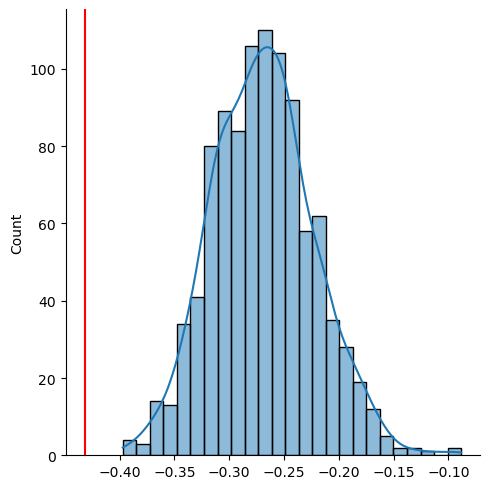

In [59]:
samples = np.array([
     df.loc[REGIONS.region.sample(len_net, replace=True)].groupby('subject').mean().corr().loc['b2e', 'score']
     for _ in range(1000)
])

true_r_mean = df.groupby(['17net', 'subject']).mean().loc['DorsAttnA'].corr().loc['b2e', 'score']

print(1 - percentileofscore(abs(samples), abs(true_r_mean)) / 100)

seaborn.displot(samples, kde=True)
plt.axvline(true_r_mean, color='r')

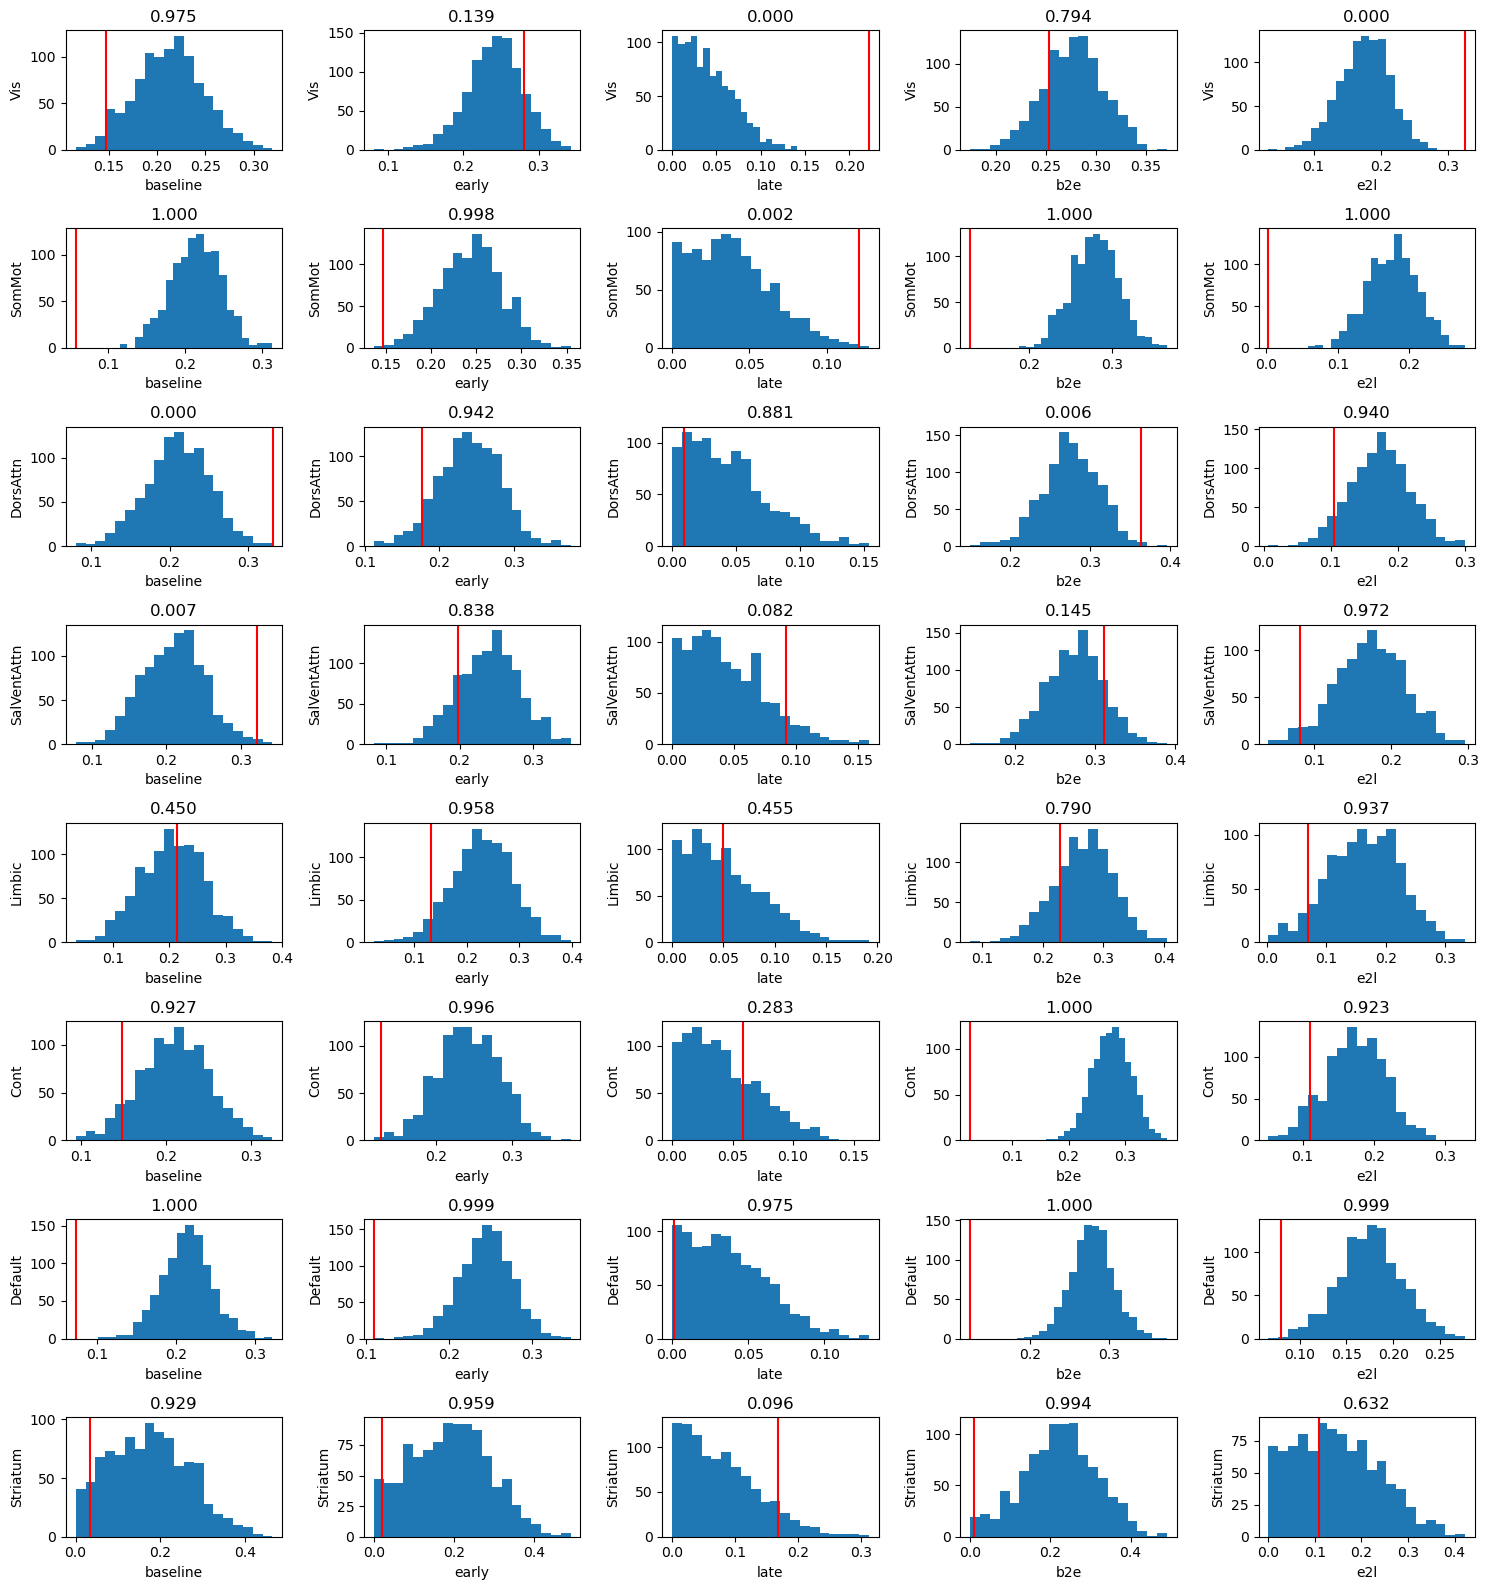

In [63]:
n_perms = 1000; nums_net = '7net'; net = 'DorsAttn'
epochs = ['baseline', 'early', 'late', 'b2e', 'e2l']

fig, axes = plt.subplots(REGIONS[nums_net].nunique(), len(epochs), figsize=(15, REGIONS[nums_net].nunique() * 2))

for i, net in enumerate(REGIONS[nums_net].unique()):    # for each network

    len_network = REGIONS[REGIONS[nums_net] == net].shape[0]
    samples = [
            df.loc[REGIONS.region.sample(len_network, replace=True)].groupby('subject').mean().corr().abs()
            for _ in range(n_perms)
        ]
    true_r_mean = df.groupby([nums_net, 'subject']).mean().loc[net].corr().abs()
    
    for j, epoch in enumerate(epochs):  # for each epoch
        samples_epoch = [s.loc[epoch, 'score'] for s in samples]
        axes[i, j].hist(samples_epoch, bins=20)
        
        true_r_mean_epoch = true_r_mean.loc[epoch, 'score']
        axes[i, j].axvline(true_r_mean_epoch, color='r')
        
        pval = 1 - percentileofscore(abs(np.array(samples_epoch)), abs(true_r_mean_epoch)) / 100
        axes[i, j].set_title(f'{pval:.3f}')
        axes[i, j].set_xlabel(epoch)
        axes[i, j].set_ylabel(net)

plt.tight_layout()
# plt.savefig(f'new_perm_{nums_net}.jpg', dpi=300)

# spins instead of non-parametric permutations

In [148]:
from netneurotools import datasets, freesurfer
from netneurotools import stats as nnstats

In [149]:
to_drop = ['unknown', 'corpuscallosum', 
           'Background+FreeSurfer_Defined_Medial_Wall',
           '7Networks_RH_Vis_33', '7Networks_RH_Cont_Cing_1']
           

annot = datasets.fetch_schaefer2018('fsaverage5', verbose=False)['1000Parcels7Networks']
coords, hemi = freesurfer.find_parcel_centroids(lhannot=annot.lh,
                                                rhannot=annot.rh,
                                                version='fsaverage5',
                                                surf='sphere',
                                                method='surface',
                                                drop=to_drop)

In [150]:
def _decode_list(vals):     return [val.decode() if hasattr(val, 'decode') else val for val in vals]

lnames, rnames = freesurfer.read_annot(annot.lh)[2], freesurfer.read_annot(annot.rh)[2]
names = _decode_list(np.concatenate([lnames, rnames]))
names = [name for name in names if name not in to_drop]

original_order = names

In [151]:
n_perms = 2000

In [152]:
# Vázquez-Rodríguez 
spins = nnstats.gen_spinsamples(coords, hemi, seed=1234, n_rotate=n_perms)
spins.shape

(998, 2000)

In [153]:
spins[:, 0].shape

(998,)

In [154]:
coords.shape

(998, 3)

In [175]:
REGIONS_ = REGIONS.copy()
REGIONS_ = REGIONS_[REGIONS_['7net'] != 'Striatum']
REGIONS_['idx'] = list(range(998))
REGIONS_

,region,7net,17net,idx
0,7Networks_LH_Vis_1,Vis,DorsAttnA,0
1,7Networks_LH_Vis_2,Vis,VisCent,1
2,7Networks_LH_Vis_3,Vis,DorsAttnA,2
3,7Networks_LH_Vis_4,Vis,VisCent,3
4,7Networks_LH_Vis_5,Vis,DefaultC,4
...,...,...,...,...
993,7Networks_RH_Default_pCunPCC_16,Default,DefaultA,993
994,7Networks_RH_Default_pCunPCC_17,Default,ContC,994
995,7Networks_RH_Default_pCunPCC_18,Default,ContC,995
996,7Networks_RH_Cont_pCun_2,Cont,ContC,996


In [174]:
df_ = df.copy().merge(REGIONS_, on='region').set_index('idx')
df_

,region,baseline,early,late,b2e,e2l,score,7net,17net
idx,,,,,,,,,
364,7Networks_LH_Cont_Cing_1,1.365288,2.435730,1.968518,1.070442,-0.467212,-1.179789,Cont,SalVentAttnB
364,7Networks_LH_Cont_Cing_1,2.908262,3.697656,1.903574,0.789394,-1.794082,1.104018,Cont,SalVentAttnB
364,7Networks_LH_Cont_Cing_1,2.180939,1.935111,1.486104,-0.245828,-0.449007,-0.302101,Cont,SalVentAttnB
364,7Networks_LH_Cont_Cing_1,1.538202,1.476047,1.880695,-0.062155,0.404649,-1.400917,Cont,SalVentAttnB
364,7Networks_LH_Cont_Cing_1,1.384322,2.644802,0.913325,1.260480,-1.731477,0.868475,Cont,SalVentAttnB
...,...,...,...,...,...,...,...,...,...
508,7Networks_RH_Vis_9,5.053828,5.406258,5.693341,0.352431,0.287083,1.119882,Vis,VisCent
508,7Networks_RH_Vis_9,5.527512,5.138982,6.562363,-0.388530,1.423381,0.007867,Vis,VisCent
508,7Networks_RH_Vis_9,4.967921,7.580087,6.494336,2.612166,-1.085751,0.350276,Vis,VisCent


In [178]:
df_.loc[REGIONS_.idx.sample(len_network, replace=True)]#.groupby('subject').mean().corr().abs()

,region,baseline,early,late,b2e,e2l,score,7net,17net
idx,,,,,,,,,
442,7Networks_LH_Default_PFC_28,2.478543,3.364809,2.709237,0.886266,-0.655572,-1.179789,Default,DefaultA
442,7Networks_LH_Default_PFC_28,2.889047,3.055647,3.757126,0.166600,0.701479,1.104018,Default,DefaultA
442,7Networks_LH_Default_PFC_28,2.953440,2.696510,1.313813,-0.256930,-1.382698,-0.302101,Default,DefaultA
442,7Networks_LH_Default_PFC_28,2.066350,2.686100,3.384534,0.619750,0.698434,-1.400917,Default,DefaultA
442,7Networks_LH_Default_PFC_28,2.222832,3.009708,2.652563,0.786876,-0.357145,0.868475,Default,DefaultA
...,...,...,...,...,...,...,...,...,...
233,7Networks_LH_SalVentAttn_ParOper_1,2.474378,4.858210,3.296804,2.383832,-1.561406,1.119882,SalVentAttn,SalVentAttnA
233,7Networks_LH_SalVentAttn_ParOper_1,3.134531,3.209645,4.308515,0.075114,1.098870,0.007867,SalVentAttn,SalVentAttnA
233,7Networks_LH_SalVentAttn_ParOper_1,2.839885,1.839924,3.088809,-0.999961,1.248885,0.350276,SalVentAttn,SalVentAttnA


In [180]:
df_

,region,baseline,early,late,b2e,e2l,score,7net,17net
idx,,,,,,,,,
364,7Networks_LH_Cont_Cing_1,1.365288,2.435730,1.968518,1.070442,-0.467212,-1.179789,Cont,SalVentAttnB
364,7Networks_LH_Cont_Cing_1,2.908262,3.697656,1.903574,0.789394,-1.794082,1.104018,Cont,SalVentAttnB
364,7Networks_LH_Cont_Cing_1,2.180939,1.935111,1.486104,-0.245828,-0.449007,-0.302101,Cont,SalVentAttnB
364,7Networks_LH_Cont_Cing_1,1.538202,1.476047,1.880695,-0.062155,0.404649,-1.400917,Cont,SalVentAttnB
364,7Networks_LH_Cont_Cing_1,1.384322,2.644802,0.913325,1.260480,-1.731477,0.868475,Cont,SalVentAttnB
...,...,...,...,...,...,...,...,...,...
508,7Networks_RH_Vis_9,5.053828,5.406258,5.693341,0.352431,0.287083,1.119882,Vis,VisCent
508,7Networks_RH_Vis_9,5.527512,5.138982,6.562363,-0.388530,1.423381,0.007867,Vis,VisCent
508,7Networks_RH_Vis_9,4.967921,7.580087,6.494336,2.612166,-1.085751,0.350276,Vis,VisCent


0.0

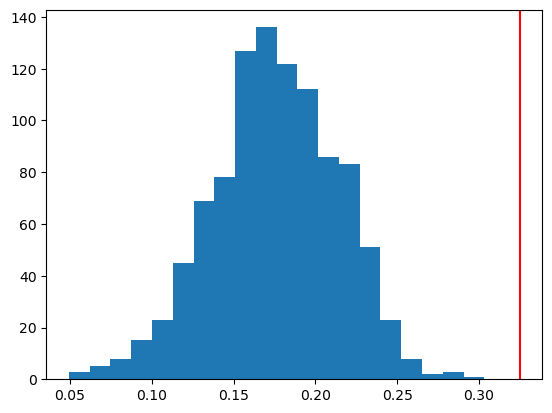

In [ ]:
len_network = REGIONS[REGIONS[nums_net] == net].shape[0]

samples = [
        df.loc[REGIONS.region.sample(len_network, replace=True)].groupby('subject').mean().corr().abs()['score']
        for _ in range(n_perms)
    ]
true_r_mean = df.groupby([nums_net, 'subject']).mean().loc[net].corr().abs()['score']

samples_epoch = [s[epoch] for s in samples]
plt.hist(samples_epoch, bins=20)

true_r_mean_epoch = true_r_mean[epoch]
plt.axvline(true_r_mean_epoch, color='r')

pval = 1 - percentileofscore(abs(np.array(samples_epoch)), abs(true_r_mean_epoch)) / 100
pval

# mean (and max) of all other networks
does not make sense to me

In [12]:
# implement Jeff's idea for (1) ecc values and (2) corr between ecc and score
# take it as the feature

In [64]:
df

,,,,,baseline,early,late,b2e,e2l,score
region,7net,17net,subject,str_id,,,,,,
7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,1,AB1,1.365288,2.435730,1.968518,1.070442,-0.467212,-1.179789
7Networks_LH_Cont_Cing_2,Cont,ContC,1,AB1,2.366235,2.368263,1.640481,0.002028,-0.727782,-1.179789
7Networks_LH_Cont_Cing_3,Cont,ContC,1,AB1,2.249189,2.536501,2.096962,0.287311,-0.439539,-1.179789
7Networks_LH_Cont_Cing_4,Cont,ContA,1,AB1,0.865526,2.047069,1.090625,1.181543,-0.956444,-1.179789
7Networks_LH_Cont_Cing_5,Cont,ContC,1,AB1,1.643546,1.893256,2.066847,0.249709,0.173591,-1.179789
...,...,...,...,...,...,...,...,...,...,...
Right Caudate,Striatum,StriatumRight,46,ZN1,0.605364,2.369958,2.807657,1.764595,0.437699,-0.116459
Right Hippocampus,Striatum,StriatumRight,46,ZN1,4.152882,1.333596,2.257146,-2.819287,0.923551,-0.116459
Right Pallidum,Striatum,StriatumRight,46,ZN1,1.632750,1.068409,1.068012,-0.564340,-0.000398,-0.116459


In [65]:
corr_with_last_col = lambda df: df.iloc[:, :-1].corrwith(df.iloc[:, -1])

df1 = df.groupby(['17net', 'subject']).mean().groupby('17net').apply(corr_with_last_col)
df1

,baseline,early,late,b2e,e2l
17net,,,,,
ContA,0.253892,0.195244,-0.145607,-0.054045,-0.203578
ContB,-0.042006,0.094848,0.009793,0.089492,-0.055866
ContC,-0.047538,-0.175655,0.112850,-0.077736,0.175062
DefaultA,0.025880,-0.126931,-0.011437,-0.111972,0.078213
DefaultB,0.116503,-0.041860,-0.037773,-0.087145,0.010485
DefaultC,0.089430,-0.251659,0.065506,-0.199560,0.197030
DorsAttnA,0.229018,-0.461523,0.108892,-0.431807,0.361120
DorsAttnB,0.194677,-0.095340,0.020308,-0.198171,0.073391
LimbicA,0.173451,-0.071515,0.011255,-0.141799,0.054111


In [16]:
df1.loc['DorsAttnA']
df1.drop('DorsAttnA').max()     # or abs max?
df1.drop('DorsAttnA').mean()    # or abs mean?

baseline    0.112495
early      -0.086484
late       -0.016831
b2e        -0.125496
e2l         0.044450
dtype: float64

In [17]:
(df1.loc['DorsAttnA'] - df1.drop('DorsAttnA').mean()).abs()

baseline    0.116523
early       0.375039
late        0.125723
b2e         0.306311
e2l         0.316670
dtype: float64

In [20]:
def abs_diff_mean(df, net):     return abs(df.loc[net] - df.drop(net).mean())
def abs_diff_max(df, net):      return abs(df.loc[net] - df.drop(net).max())

In [21]:
abs_mean = pd.concat([abs_diff_mean(df1, net) for net in REGIONS['17net'].unique()], axis=1, keys=REGIONS['17net'].unique()).T
abs_max = pd.concat([abs_diff_max(df1, net) for net in REGIONS['17net'].unique()], axis=1, keys=REGIONS['17net'].unique()).T
true = pd.concat([abs_mean, abs_max], axis=1, keys=['abs_mean', 'abs_max'], names=['stat', 'epoch'])
true.index.name = '17net'
true

stat           abs_mean                                           abs_max  \
epoch          baseline     early      late       b2e       e2l  baseline   
17net                                                                       
DorsAttnA      0.116523  0.375039  0.125723  0.306311  0.316670  0.098594   
VisCent        0.054308  0.199432  0.218694  0.128272  0.276895  0.157534   
DefaultC       0.030820  0.153516  0.079927  0.061162  0.143464  0.238182   
VisPeri        0.001326  0.053840  0.230299  0.035796  0.182055  0.207728   
ContC          0.175397  0.073290  0.129900  0.067430  0.120275  0.375150   
SomMotB        0.097249  0.086174  0.014306  0.096126  0.027683  0.116854   
TempPar        0.032880  0.019921  0.083760  0.004323  0.035883  0.177835   
DorsAttnB      0.080274  0.011487  0.032217  0.059695  0.012956  0.132935   
SomMotA        0.268392  0.051261  0.178032  0.198067  0.125887  0.463250   
ContA          0.142779  0.318215  0.142915  0.092437  0.279401  0.073720   
SalVentAttnA   0.220595  0.065167  0.135142  0.167599  0.036397  0.040519   
SalVentAttnB   0.177825  0.117498  0.085328  0.070499  0.136816  0.040519   
LimbicB        0.079332  0.006998  0.054852  0.094721  0.031138  0.133828   
LimbicA        0.057869  0.036636  0.022661  0.000192  0.007396  0.154161   
ContB          0.169558  0.212242  0.021118  0.243948  0.123482  0.369618   
DefaultB       0.002243  0.067939  0.029091  0.057498  0.053445  0.211109   
DefaultA       0.097901  0.021858  0.001291  0.031293  0.018046  0.301733   
StriatumLeft   0.091296  0.038529  0.046055  0.073188  0.055325  0.295476   
StriatumRight  0.225351  0.147590  0.257286  0.252188  0.284639  0.422475   

stat                                                   
epoch             early      late       b2e       e2l  
17net                                                  
DorsAttnA      0.656768  0.099072  0.529104  0.037682  
VisCent        0.490403  0.010994  0.360435  0.037682  
DefaultC       0.446903  0.142458  0.296857  0.164090  
VisPeri        0.352473  0.010994  0.272826  0.127530  
ContC          0.370899  0.095115  0.175034  0.186058  
SomMotB        0.383105  0.231731  0.329981  0.273777  
TempPar        0.282595  0.138827  0.234819  0.266009  
DorsAttnB      0.290584  0.187656  0.295468  0.287729  
SomMotA        0.252904  0.386840  0.051272  0.419264  
ContA          0.100396  0.353571  0.151342  0.564698  
SalVentAttnA   0.363204  0.346207  0.397692  0.334484  
SalVentAttnB   0.190154  0.299016  0.305703  0.429618  
LimbicB        0.294837  0.270143  0.328651  0.329502  
LimbicA        0.266759  0.196710  0.239097  0.307010  
ContB          0.100396  0.198172  0.007806  0.416987  
DefaultB       0.237104  0.245738  0.184443  0.350635  
DefaultA       0.322175  0.219402  0.209269  0.282907  
StriatumLeft   0.264966  0.261810  0.169578  0.352417  
StriatumRight  0.161645  0.461923  0.007806  0.569661

In [100]:
df

,subject,region,7net,17net,baseline,early,late,b2e,e2l,str_id,score
0,1,7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,1.365288,2.435730,1.968518,1.070442,-0.467212,AB1,-1.179789
1,1,7Networks_LH_Cont_Cing_2,Cont,ContC,2.366235,2.368263,1.640481,0.002028,-0.727782,AB1,-1.179789
2,1,7Networks_LH_Cont_Cing_3,Cont,ContC,2.249189,2.536501,2.096962,0.287311,-0.439539,AB1,-1.179789
3,1,7Networks_LH_Cont_Cing_4,Cont,ContA,0.865526,2.047069,1.090625,1.181543,-0.956444,AB1,-1.179789
4,1,7Networks_LH_Cont_Cing_5,Cont,ContC,1.643546,1.893256,2.066847,0.249709,0.173591,AB1,-1.179789
...,...,...,...,...,...,...,...,...,...,...,...
36427,46,Right Caudate,Striatum,StriatumRight,0.605364,2.369958,2.807657,1.764595,0.437699,ZN1,-0.116459
36428,46,Right Hippocampus,Striatum,StriatumRight,4.152882,1.333596,2.257146,-2.819287,0.923551,ZN1,-0.116459
36429,46,Right Pallidum,Striatum,StriatumRight,1.632750,1.068409,1.068012,-0.564340,-0.000398,ZN1,-0.116459
36430,46,Right Putamen,Striatum,StriatumRight,0.860830,2.656682,1.599829,1.795852,-1.056853,ZN1,-0.116459


In [101]:
df.groupby(['17net', 'subject']).mean()

baseline     early      late       b2e       e2l     score
17net   subject                                                            
ContA   1        2.146459  2.428945  2.720407  0.282486  0.291462 -1.179789
        2        2.499108  2.852549  2.595560  0.353441 -0.256989  1.104018
        3        3.128054  2.501633  2.300632 -0.626421 -0.201001 -0.302101
        4        2.264538  2.498469  2.470974  0.233931 -0.027494 -1.400917
        6        2.623775  2.919449  2.749070  0.295674 -0.170379  0.868475
...                   ...       ...       ...       ...       ...       ...
VisPeri 40       5.194089  5.276279  5.464735  0.082190  0.188456  1.119882
        41       4.677753  5.175338  6.080227  0.497585  0.904889  0.007867
        44       4.499702  7.232317  5.728070  2.732615 -1.504247  0.350276
        45       5.604105  4.712497  5.875276 -0.891609  1.162779  1.649951
        46       5.912186  5.250247  5.540575 -0.661939  0.290328 -0.116459

[684 rows x 6 columns]

In [145]:
regions_perm = REGIONS.region.sample(frac=1, replace=False)#.tolist()
regions_perm

50                       7Networks_LH_Vis_51
39                       7Networks_LH_Vis_40
353                7Networks_LH_Cont_PFCl_17
891                7Networks_RH_Cont_PFCl_28
808          7Networks_RH_SalVentAttn_Med_19
                       ...                  
314          7Networks_LH_Limbic_TempPole_13
623                   7Networks_RH_SomMot_44
844                  7Networks_RH_Cont_Par_4
449              7Networks_LH_Default_PFC_35
257    7Networks_LH_SalVentAttn_FrOperIns_14
Name: region, Length: 1012, dtype: object

In [146]:
df2 = df.drop(['7net', 'str_id'], axis=1)#.set_index(['region']).loc[regions_perm.tolist() * len(SUBJECTS)]
df2['region'] = regions_perm.tolist() * len(SUBJECTS)
df2

,subject,region,17net,baseline,early,late,b2e,e2l,score
0,1,7Networks_LH_Vis_51,SalVentAttnB,1.365288,2.435730,1.968518,1.070442,-0.467212,-1.179789
1,1,7Networks_LH_Vis_40,ContC,2.366235,2.368263,1.640481,0.002028,-0.727782,-1.179789
2,1,7Networks_LH_Cont_PFCl_17,ContC,2.249189,2.536501,2.096962,0.287311,-0.439539,-1.179789
3,1,7Networks_RH_Cont_PFCl_28,ContA,0.865526,2.047069,1.090625,1.181543,-0.956444,-1.179789
4,1,7Networks_RH_SalVentAttn_Med_19,ContC,1.643546,1.893256,2.066847,0.249709,0.173591,-1.179789
...,...,...,...,...,...,...,...,...,...
36427,46,7Networks_LH_Limbic_TempPole_13,StriatumRight,0.605364,2.369958,2.807657,1.764595,0.437699,-0.116459
36428,46,7Networks_RH_SomMot_44,StriatumRight,4.152882,1.333596,2.257146,-2.819287,0.923551,-0.116459
36429,46,7Networks_RH_Cont_Par_4,StriatumRight,1.632750,1.068409,1.068012,-0.564340,-0.000398,-0.116459
36430,46,7Networks_LH_Default_PFC_35,StriatumRight,0.860830,2.656682,1.599829,1.795852,-1.056853,-0.116459


In [148]:
df2.groupby(['17net', 'subject']).mean()

baseline     early      late       b2e       e2l     score
17net   subject                                                            
ContA   1        2.146459  2.428945  2.720407  0.282486  0.291462 -1.179789
        2        2.499108  2.852549  2.595560  0.353441 -0.256989  1.104018
        3        3.128054  2.501633  2.300632 -0.626421 -0.201001 -0.302101
        4        2.264538  2.498469  2.470974  0.233931 -0.027494 -1.400917
        6        2.623775  2.919449  2.749070  0.295674 -0.170379  0.868475
...                   ...       ...       ...       ...       ...       ...
VisPeri 40       5.194089  5.276279  5.464735  0.082190  0.188456  1.119882
        41       4.677753  5.175338  6.080227  0.497585  0.904889  0.007867
        44       4.499702  7.232317  5.728070  2.732615 -1.504247  0.350276
        45       5.604105  4.712497  5.875276 -0.891609  1.162779  1.649951
        46       5.912186  5.250247  5.540575 -0.661939  0.290328 -0.116459

[684 rows x 6 columns]

In [149]:
df2_ = df2.groupby(['17net', 'subject']).mean().groupby('17net').apply(corr_with_last_col)
df2_

,baseline,early,late,b2e,e2l
17net,,,,,
ContA,0.253892,0.195244,-0.145607,-0.054045,-0.203578
ContB,-0.042006,0.094848,0.009793,0.089492,-0.055866
ContC,-0.047538,-0.175655,0.112850,-0.077736,0.175062
DefaultA,0.025880,-0.126931,-0.011437,-0.111972,0.078213
DefaultB,0.116503,-0.041860,-0.037773,-0.087145,0.010485
DefaultC,0.089430,-0.251659,0.065506,-0.199560,0.197030
DorsAttnA,0.229018,-0.461523,0.108892,-0.431807,0.361120
DorsAttnB,0.194677,-0.095340,0.020308,-0.198171,0.073391
LimbicA,0.173451,-0.071515,0.011255,-0.141799,0.054111


In [109]:
pd.concat([abs_diff_mean(df2_, net) for net in REGIONS['17net'].unique()], 
                      axis=1, keys=REGIONS['17net'].unique()).T

,baseline,early,late,b2e,e2l
DorsAttnA,0.116523,0.375039,0.125723,0.306311,0.316670
VisCent,0.054308,0.199432,0.218694,0.128272,0.276895
DefaultC,0.030820,0.153516,0.079927,0.061162,0.143464
VisPeri,0.001326,0.053840,0.230299,0.035796,0.182055
ContC,0.175397,0.073290,0.129900,0.067430,0.120275
SomMotB,0.097249,0.086174,0.014306,0.096126,0.027683
TempPar,0.032880,0.019921,0.083760,0.004323,0.035883
DorsAttnB,0.080274,0.011487,0.032217,0.059695,0.012956
SomMotA,0.268392,0.051261,0.178032,0.198067,0.125887
ContA,0.142779,0.318215,0.142915,0.092437,0.279401


In [110]:
df_ = df.groupby(['17net', 'subject']).mean().groupby('17net').apply(corr_with_last_col)
df_

,baseline,early,late,b2e,e2l
17net,,,,,
ContA,0.253892,0.195244,-0.145607,-0.054045,-0.203578
ContB,-0.042006,0.094848,0.009793,0.089492,-0.055866
ContC,-0.047538,-0.175655,0.112850,-0.077736,0.175062
DefaultA,0.025880,-0.126931,-0.011437,-0.111972,0.078213
DefaultB,0.116503,-0.041860,-0.037773,-0.087145,0.010485
DefaultC,0.089430,-0.251659,0.065506,-0.199560,0.197030
DorsAttnA,0.229018,-0.461523,0.108892,-0.431807,0.361120
DorsAttnB,0.194677,-0.095340,0.020308,-0.198171,0.073391
LimbicA,0.173451,-0.071515,0.011255,-0.141799,0.054111


In [111]:
diff_mean = pd.concat([abs_diff_mean(df_, net) for net in REGIONS['17net'].unique()], 
                      axis=1, keys=REGIONS['17net'].unique()).T
diff_mean

,baseline,early,late,b2e,e2l
DorsAttnA,0.116523,0.375039,0.125723,0.306311,0.316670
VisCent,0.054308,0.199432,0.218694,0.128272,0.276895
DefaultC,0.030820,0.153516,0.079927,0.061162,0.143464
VisPeri,0.001326,0.053840,0.230299,0.035796,0.182055
ContC,0.175397,0.073290,0.129900,0.067430,0.120275
SomMotB,0.097249,0.086174,0.014306,0.096126,0.027683
TempPar,0.032880,0.019921,0.083760,0.004323,0.035883
DorsAttnB,0.080274,0.011487,0.032217,0.059695,0.012956
SomMotA,0.268392,0.051261,0.178032,0.198067,0.125887
ContA,0.142779,0.318215,0.142915,0.092437,0.279401


## test of ecc, not corr

In [560]:
# only ecc

dfg = df_gradients.reset_index()
original_order = dfg.loc[dfg['subject'] == 1, '17net']
original_order

idx = original_order.sample(frac=1, replace=False)

dfg[num_nets] = idx.tolist() * len(SUBJECTS)

ecc_mean = dfg.groupby([num_nets,
                        # 'subject',
                        ]).mean().drop('subject', axis=1)

ecc_mean

epoch,baseline,early,late,b2e,e2l
7net,,,,,
ContA,2.944062,3.191032,3.243517,0.246970,0.052485
ContB,2.734886,2.941138,3.001263,0.206252,0.060125
ContC,2.970223,3.217973,3.324755,0.247750,0.106782
DefaultA,2.986040,3.220140,3.311749,0.234100,0.091609
DefaultB,3.118947,3.351036,3.456340,0.232089,0.105304
DefaultC,2.920048,3.246194,3.226256,0.326146,-0.019938
DorsAttnA,2.838066,3.084491,3.156785,0.246426,0.072293
DorsAttnB,3.186090,3.429517,3.594134,0.243427,0.164617
LimbicA,3.124894,3.320304,3.422219,0.195410,0.101916


In [574]:
df_ = df.copy()

df_ = df_.groupby(['17net']).mean().drop(['subject', 'score'], axis=1)


,baseline,early,late,b2e,e2l
17net,,,,,
ContA,2.785931,2.962243,3.132055,0.176311,0.169812
ContB,3.012001,3.327246,3.329105,0.315245,0.001859
ContC,2.844937,3.072761,3.118334,0.227825,0.045573
DefaultA,2.752958,2.972568,3.034882,0.219610,0.062314
DefaultB,2.994471,3.115596,3.253434,0.121125,0.137838
DefaultC,3.292899,3.424956,3.593966,0.132057,0.169010
DorsAttnA,2.943049,3.251736,3.359490,0.308687,0.107753
DorsAttnB,2.767409,2.934223,3.039442,0.166813,0.105220
LimbicA,3.256860,3.559486,3.651512,0.302626,0.092026


In [562]:
def abs_diff_mean(df, net):     return abs(df.loc[net] - df.drop(net).mean())
def abs_diff_max(df, net):      return abs(df.loc[net] - df.drop(net).max())

In [575]:
def permute(df, idx, func, num_nets):
    df[num_nets] = idx.tolist() * len(SUBJECTS)
    
    # ecc_corr = df.groupby([num_nets, 'subject']).mean().groupby(num_nets).apply(corr_with_last_col)
    ecc_corr = df.groupby([num_nets]).mean().drop(['subject', 'score'], axis=1)
    
    return pd.concat([func(ecc_corr, net) for net in REGIONS[num_nets].unique()], 
                      axis=0, keys=REGIONS[num_nets].unique()).T

In [576]:
def plot_permutation(df_samples, true_series, num_nets):
    
    
    num_samples = df_samples.shape[1]
    epochs = df_samples.index.get_level_values('epoch').unique()
    
    fig, axes = plt.subplots(REGIONS[num_nets].nunique(), len(epochs), figsize=(12, int(REGIONS[num_nets].nunique() * 1.7)))

    for i, net in enumerate(REGIONS[num_nets].unique()):
        for j, epoch in enumerate(epochs):
            samples = df_samples.loc[net, epoch]
            true = true_series.loc[net, epoch]
            
            axes[i, j].hist(samples, bins=20)
            axes[i, j].axvline(true, color='r')
            
            ans = np.array(samples)[np.array(samples) > true].shape[0] / num_samples
            axes[i, j].set_title(f'{ans:.3f}')
            
            axes[i, j].set_xlabel(epoch)
            axes[i, j].set_ylabel(net)
    
    plt.tight_layout(); plt.savefig(f'Jeff_perm_{num_nets}.jpg', dpi=300)

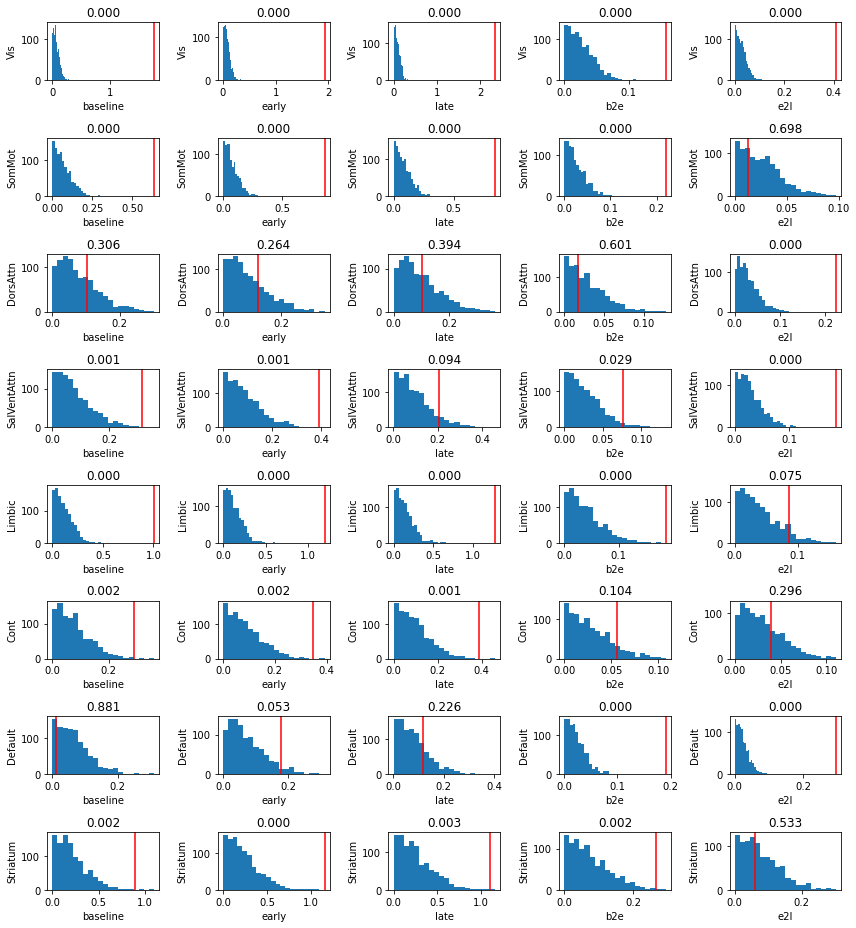

In [580]:
num_samples = 1000; num_nets = '7net'

original_order = df.loc[df_['subject'] == 1, num_nets]
df_ = df.copy()

mean_diff = pd.concat([permute(df_, original_order.sample(frac=1, replace=False), abs_diff_mean, num_nets)
                       for _ in range(num_samples)], axis=1, keys=range(num_samples))
mean_diff.index.names = [num_nets, 'epoch']

plot_permutation(mean_diff,
                 permute(df, original_order, abs_diff_mean, num_nets), 
                 num_nets)